Accuracy on the test set: 72.73%


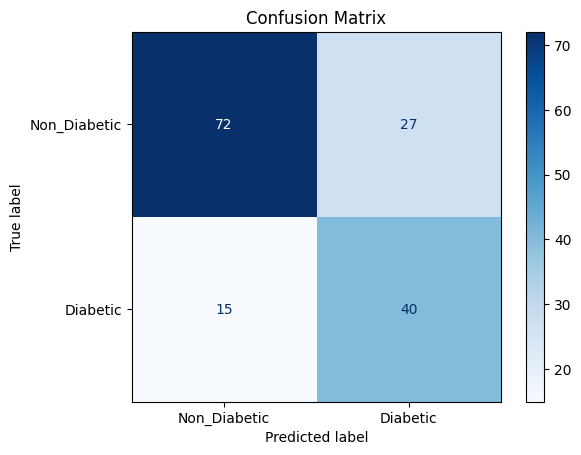

In [26]:
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

np.random.seed(2024)
diabetes = pd.read_csv('diabetes_preprocessed.csv')

y = diabetes.get('Outcome').values
X = diabetes.drop(axis='columns', columns ='Outcome').values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

clf = tree.DecisionTreeClassifier(max_depth=5, criterion='gini')
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred) # accuracy score using a single decision tree
# >>> ca. 0.688
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Non_Diabetic', 'Diabetic'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

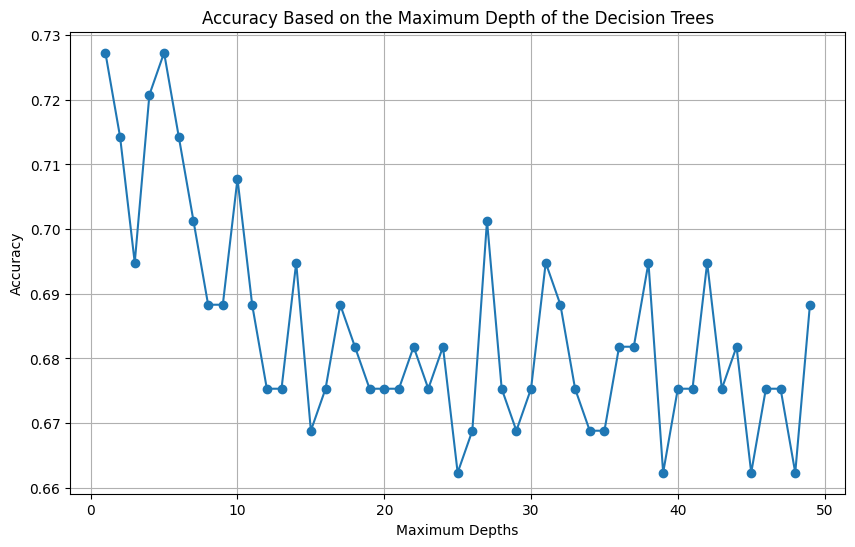

In [22]:
## testing different number of trees
depths = list(range(1,50))

results = []
best_accuracy = 0

for depth in range(1,50):
    dec_tree = tree.DecisionTreeClassifier(max_depth=depth, criterion='gini')
    dec_tree.fit(X_train, y_train)
    y_pred = dec_tree.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) 
    results.append(accuracy)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_num = dec_tree

plt.figure(figsize=(10, 6))
plt.plot(depths, results, marker='o')
plt.xlabel('Maximum Depths')
plt.ylabel('Accuracy')
plt.title("Accuracy Based on the Maximum Depth of the Decision Trees")
#plt.scatter([best_num], [best_accuracy], color='red', label=f'Best Depth={best_num:.4f}, Acc={best_accuracy:.2f}')
#plt.legend()
plt.grid()
plt.show

Accuracy on the test set: 75.97%


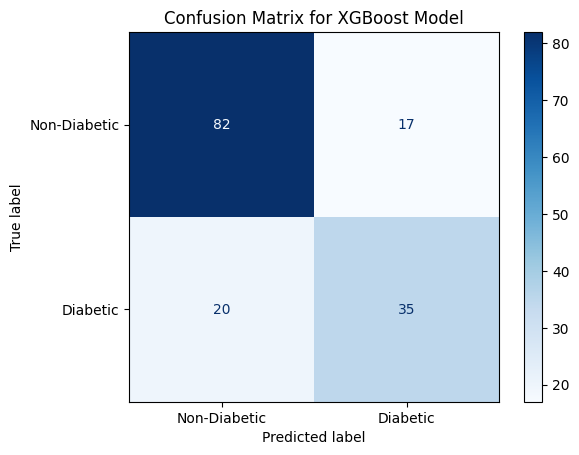

In [202]:
from xgboost import XGBClassifier

# Train an XGBoost Classifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Generate predictions
y_pred_test = xgb_model.predict(X_test)
y_pred_prob_test = xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Non-Diabetic', 'Diabetic'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for XGBoost Model")
plt.show()

# ROC AUC Plot
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)